In [1]:
import pandas as pd

In [2]:
tb_data = pd.read_parquet('surf_time_block_info.parquet')

In [3]:
tb_data

,node,block_id,start_time,end_time,start_row,end_row,anomalyCount,num_records,block_duration_sec,block_duration
0,r11n15,0,2022-06-30 16:00:30,2022-07-07 11:32:00,1,19624,0,19624,588690,163:31:30
1,r11n15,1,2022-07-07 11:36:00,2022-07-14 07:16:30,19625,39266,264,19642,589230,163:40:30
2,r11n15,2,2022-07-14 09:17:00,2022-07-15 09:16:30,39267,42146,1268,2880,86370,23:59:30
3,r11n15,3,2022-07-15 11:17:00,2022-07-16 09:16:30,42147,44786,0,2640,79170,21:59:30
4,r11n15,4,2022-07-16 11:17:00,2022-07-17 09:16:30,44787,47426,0,2640,79170,21:59:30
...,...,...,...,...,...,...,...,...,...,...
14012,r27n23,41,2022-11-01 12:40:00,2022-11-09 17:17:00,348276,371870,0,23595,707820,196:37:00
14013,r27n23,42,2022-11-09 18:17:30,2022-11-14 09:27:30,371871,385211,0,13341,400200,111:10:00
14014,r27n23,43,2022-11-14 10:28:00,2022-11-14 10:46:30,385212,385249,0,38,1110,0:18:30
14015,r27n23,44,2022-11-14 11:47:00,2022-11-17 16:04:00,385250,394404,398,9155,274620,76:17:00


In [27]:
tb_data

,node,block_id,start_time,end_time,start_row,end_row,anomalyCount,num_records,block_duration_sec,block_duration
0,r14n30,1872,1583154945,1584461130,245722,332801,34020,87080,1306185,362:49:45
1,r14n17,597,1583154630,1584478275,310385,398628,30136,88244,1323645,367:40:45
2,r15n12,649,1583136495,1584444780,313940,401159,29954,87220,1308285,363:24:45
3,r15n25,1541,1583134785,1583972460,261778,317623,29644,55846,837675,232:41:15
4,r10n20,756,1582373550,1584423855,251417,388104,29618,136688,2050305,569:31:45
...,...,...,...,...,...,...,...,...,...,...
374899,r26n27,1165,1584183690,1584183795,363969,363976,0,8,105,0:01:45
374900,r26n27,1166,1584184560,1584184665,363977,363984,0,8,105,0:01:45
374901,r26n27,1167,1584184950,1584184965,363985,363986,0,2,15,0:00:15
374902,r26n27,1168,1584185490,1584185595,363987,363994,0,8,105,0:01:45


In [3]:
node_data_breakdown = tb_data.groupby('node')['block_duration_sec'].mean()
avg_breakdown = node_data_breakdown.mean()
max_breakdown_node = node_data_breakdown.idxmax()
min_breakdown_node = node_data_breakdown.idxmin()
print(f"平均数据断点时间为：{avg_breakdown} 秒")
print(f"数据断点时间最长的节点为：{max_breakdown_node}")
print(f"数据断点时间最短的节点为：{min_breakdown_node}")

node_anomalies = tb_data.groupby('node')['anomalyCount'].sum()
total_anomalies = node_anomalies.sum()
max_anomalies_node = node_anomalies.idxmax()
min_anomalies_node = node_anomalies.idxmin()
print(f"所有节点总的异常值数量为：{total_anomalies}")
print(f"异常值最多的节点为：{max_anomalies_node}")
print(f"异常值最少的节点为：{min_anomalies_node}")

node_records = tb_data.groupby('node')['num_records'].sum()
total_records = node_records.sum()
max_records_node = node_records.idxmax()
min_records_node = node_records.idxmin()
print(f"所有节点总的记录数量为：{total_records}")
print(f"记录数最多的节点为：{max_records_node}")
print(f"记录数最少的节点为：{min_records_node}")

node_breakdown_duration = tb_data.groupby('node')['block_duration_sec'].mean()
avg_breakdown_duration = node_breakdown_duration.mean()
max_breakdown_duration_node = node_breakdown_duration.idxmax()
min_breakdown_duration_node = node_breakdown_duration.idxmin()
print(f"平均中断时间长度为：{avg_breakdown_duration} 秒")
print(f"中断时间最长的节点为：{max_breakdown_duration_node}")
print(f"中断时间最短的节点为：{min_breakdown_duration_node}")


平均数据断点时间为：6272.300214153417 秒
数据断点时间最长的节点为：r10n4
数据断点时间最短的节点为：r12n30
所有节点总的异常值数量为：3814028
异常值最多的节点为：r12n2
异常值最少的节点为：r12n30
所有节点总的记录数量为：131170780
记录数最多的节点为：r10n4
记录数最少的节点为：r12n30
平均中断时间长度为：6272.300214153417 秒
中断时间最长的节点为：r10n4
中断时间最短的节点为：r12n30


In [16]:
breakdown_month_counts = tb_data.groupby('breakdown_month').agg({'node': ['count', pd.Series.nunique]})
breakdown_month_counts.columns = ['breakdown_count', 'affected_node_count']
print(breakdown_month_counts)


                 breakdown_count  affected_node_count
breakdown_month                                      
2019-12                       20                    5
2020-01                   171079                  283
2020-02                   136678                  283
2020-03                    60614                  283
2020-04                     6230                  211


In [17]:
tb_data['anomaly_month'] = tb_data['start_time'].dt.to_period('M')

anomaly_month_counts = tb_data.groupby('anomaly_month')['anomalyCount'].sum()
print(anomaly_month_counts)

anomaly_month
2019-12        210
2020-01     715582
2020-02     835460
2020-03    2033360
2020-04      13178
Freq: M, Name: anomalyCount, dtype: int64


In [18]:
anomaly_month_counts = tb_data.groupby('anomaly_month').agg({'node': pd.Series.nunique, 'anomalyCount': sum})
anomaly_month_counts.columns = ['affected_node_count', 'anomaly_count']
print(anomaly_month_counts)


               affected_node_count  anomaly_count
anomaly_month                                    
2019-12                        282            210
2020-01                        283         715582
2020-02                        283         835460
2020-03                        283        2033360
2020-04                        178          13178


最长的数据中断时间为：2050305 秒
最短的数据中断时间为：0 秒


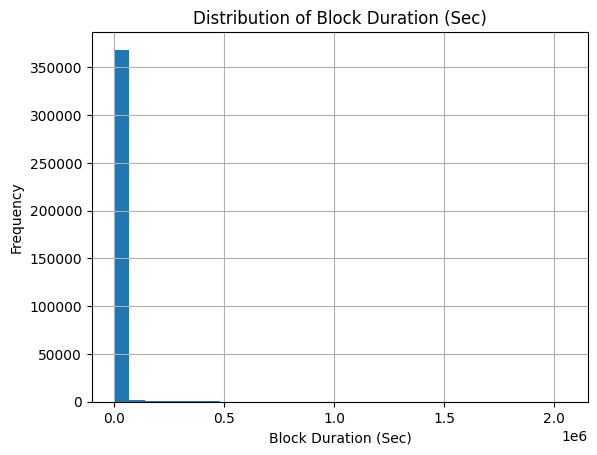

In [10]:
import matplotlib.pyplot as plt
max_duration = tb_data['block_duration_sec'].max()
min_duration = tb_data['block_duration_sec'].min()

print(f"最长的数据中断时间为：{max_duration} 秒")
print(f"最短的数据中断时间为：{min_duration} 秒")

tb_data['block_duration_sec'].hist(bins=30)
plt.title('Distribution of Block Duration (Sec)')
plt.xlabel('Block Duration (Sec)')
plt.ylabel('Frequency')
plt.show()


In [17]:
tb_data

,node,block_id,start_time,end_time,start_row,end_row,anomalyCount,num_records,block_duration_sec,block_duration,next_start_time,data_break_duration
600,r10n1,0,2019-12-31 23:00:00,2020-01-09 22:59:45,1,51840,0,51840,777585,215:59:45,2020-01-10 23:00:00,86415.0
601,r10n1,1,2020-01-10 23:00:00,2020-01-15 22:59:45,51841,80640,1162,28800,431985,119:59:45,2020-01-16 23:00:00,86415.0
735,r10n10,0,2019-12-31 23:00:00,2020-01-09 22:59:45,1,51840,3758,51840,777585,215:59:45,2020-01-10 23:00:00,86415.0
736,r10n10,1,2020-01-10 23:00:00,2020-01-15 22:59:45,51841,80640,0,28800,431985,119:59:45,2020-01-16 23:00:00,86415.0
669,r10n11,0,2019-12-31 23:00:00,2020-01-09 22:59:45,1,51840,78,51840,777585,215:59:45,2020-01-10 23:00:00,86415.0
...,...,...,...,...,...,...,...,...,...,...,...,...
733,r38n2,1,2020-01-10 23:00:00,2020-01-15 22:59:45,51841,80640,0,28800,431985,119:59:45,2020-01-16 23:00:00,86415.0
399,r38n3,0,2019-12-31 23:00:00,2020-01-09 22:59:45,1,51840,0,51840,777585,215:59:45,2020-01-10 23:00:00,86415.0
400,r38n3,1,2020-01-10 23:00:00,2020-01-15 22:59:45,51841,80640,0,28800,431985,119:59:45,2020-01-16 23:00:00,86415.0
861,r38n4,0,2019-12-31 23:00:00,2020-01-09 22:59:45,1,51840,0,51840,777585,215:59:45,2020-01-10 23:00:00,86415.0


In [3]:
tb_data['start_time'] = pd.to_datetime(tb_data['start_time'], unit='s')
tb_data['end_time'] = pd.to_datetime(tb_data['end_time'], unit='s')

tb_data.sort_values(['node', 'start_time'], inplace=True)

tb_data['next_start_time'] = tb_data.groupby('node')['start_time'].shift(-1)

mask = ~tb_data['next_start_time'].isna() & ~tb_data['end_time'].isna()
tb_data.loc[mask, 'data_break_duration'] = (tb_data['next_start_time'] - tb_data['end_time']).dt.total_seconds()

tb_data = tb_data.dropna(subset=['data_break_duration'])



count    3.746210e+05
mean     8.698184e+02
std      5.375872e+03
min      4.500000e+01
25%      4.650000e+02
50%      7.650000e+02
75%      8.250000e+02
max      2.249625e+06
Name: data_break_duration, dtype: float64


/tmp/ipykernel_609662/889967595.py:16: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(filtered_data['data_break_duration'], shade=True)


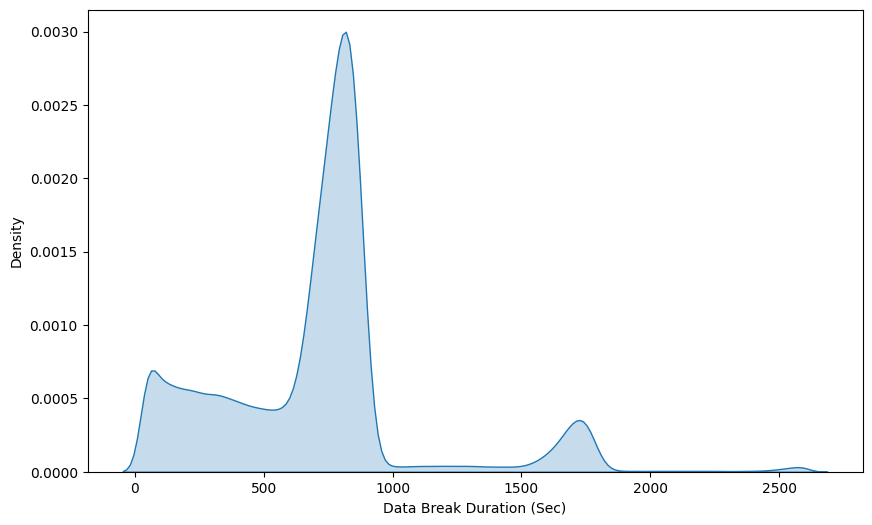

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt


break_duration_stats = tb_data['data_break_duration'].describe()
print(break_duration_stats)

plt.figure(figsize=(10, 6))

upper_limit = tb_data['data_break_duration'].quantile(0.99)
lower_limit = tb_data['data_break_duration'].quantile(0.01)
filtered_data = tb_data[(tb_data['data_break_duration'] >= lower_limit) & (tb_data['data_break_duration'] <= upper_limit)]
sns.kdeplot(filtered_data['data_break_duration'], shade=True)


plt.ylabel('Density')
plt.xlabel('Data Break Duration (Sec)')

plt.savefig('density_plot.pdf')

plt.show()


最长的数据中断时间为：2249625.0 秒
最短的数据中断时间为：45.0 秒
最短的数据中断时间为：869.8184164795887 秒


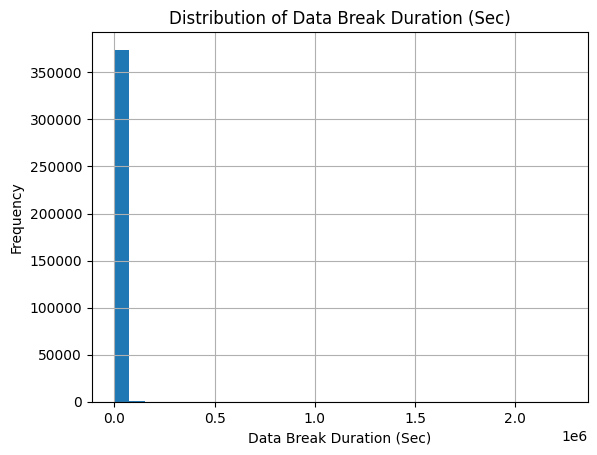

                 breakdown_count  affected_node_count
breakdown_month                                      
2019-12                       20                    5
2020-01                   171079                  283
2020-02                   136678                  283
2020-03                    60614                  283
2020-04                     6230                  211


/tmp/ipykernel_256993/1898455525.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tb_data['breakdown_month'] = tb_data['end_time'].dt.to_period('M')


In [11]:
max_duration = tb_data['data_break_duration'].max()
min_duration = tb_data['data_break_duration'].min()
mean_duration = tb_data['data_break_duration'].mean()
print(f"最长的数据中断时间为：{max_duration} 秒")
print(f"最短的数据中断时间为：{min_duration} 秒")
print(f"最短的数据中断时间为：{mean_duration} 秒")

tb_data['data_break_duration'].hist(bins=30)
plt.title('Distribution of Data Break Duration (Sec)')
plt.xlabel('Data Break Duration (Sec)')
plt.ylabel('Frequency')
plt.show()

tb_data['breakdown_month'] = tb_data['end_time'].dt.to_period('M')

breakdown_month_counts = tb_data.groupby('breakdown_month').agg({'node': ['count', pd.Series.nunique]})
breakdown_month_counts.columns = ['breakdown_count', 'affected_node_count']
print(breakdown_month_counts)



In [12]:
node_break_duration = tb_data.groupby('node')['data_break_duration'].sum()

max_break_duration_node = node_break_duration.idxmax()
min_break_duration_node = node_break_duration.idxmin()

max_break_duration = node_break_duration.max()
min_break_duration = node_break_duration.min()

print(f"中断时间最长的节点为：{max_break_duration_node}，中断时间为：{max_break_duration} 秒")
print(f"中断时间最短的节点为：{min_break_duration_node}，中断时间为：{min_break_duration} 秒")


中断时间最长的节点为：r12n30，中断时间为：7472385.0 秒
中断时间最短的节点为：r10n4，中断时间为：357855.0 秒


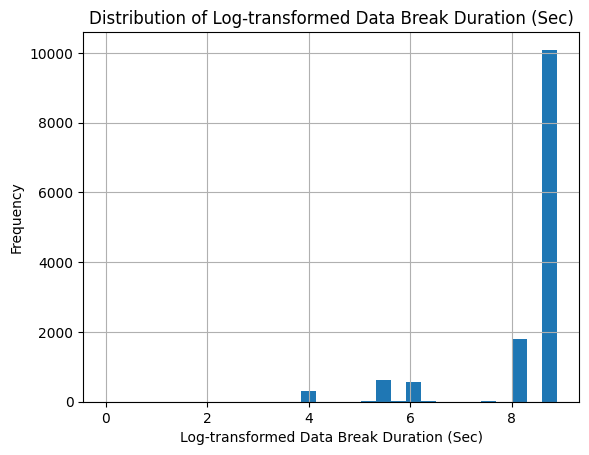

In [15]:
import numpy as np

log_break_duration = np.log1p(tb_data['data_break_duration'])

log_break_duration.hist(bins=30, range=[0, np.percentile(log_break_duration, 95)])
plt.title('Distribution of Log-transformed Data Break Duration (Sec)')
plt.xlabel('Log-transformed Data Break Duration (Sec)')
plt.ylabel('Frequency')
plt.show()


count    3.746210e+05
mean     8.698184e+02
std      5.375872e+03
min      4.500000e+01
25%      4.650000e+02
50%      7.650000e+02
75%      8.250000e+02
max      2.249625e+06
Name: data_break_duration, dtype: float64


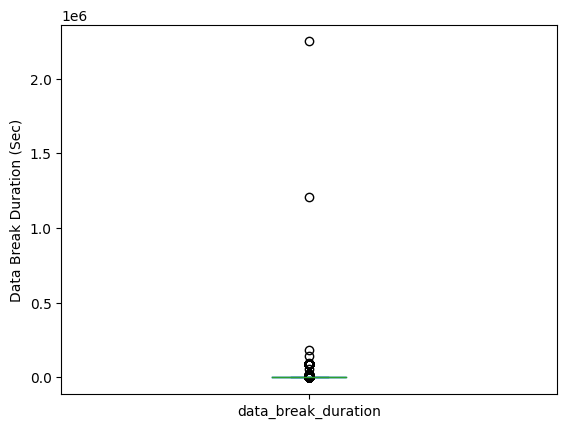

In [13]:
import matplotlib.pyplot as plt

break_duration_stats = tb_data['data_break_duration'].describe()
print(break_duration_stats)

plt.figure()
tb_data['data_break_duration'].plot(kind='box')
plt.ylabel('Data Break Duration (Sec)')

plt.savefig('boxplot.pdf')

plt.show()


In [14]:
q1 = break_duration_stats['25%']
q3 = break_duration_stats['75%']

middle_50_percent_ratio = (tb_data[(tb_data['data_break_duration'] >= q1) & (tb_data['data_break_duration'] <= q3)].shape[0] / tb_data.shape[0]) * 100

print(f"大部分的数据中断时间（约{middle_50_percent_ratio:.2f}%）都集中在 {q1} 到 {q3} 秒之间。")


大部分的数据中断时间（约51.43%）都集中在 465.0 到 825.0 秒之间。


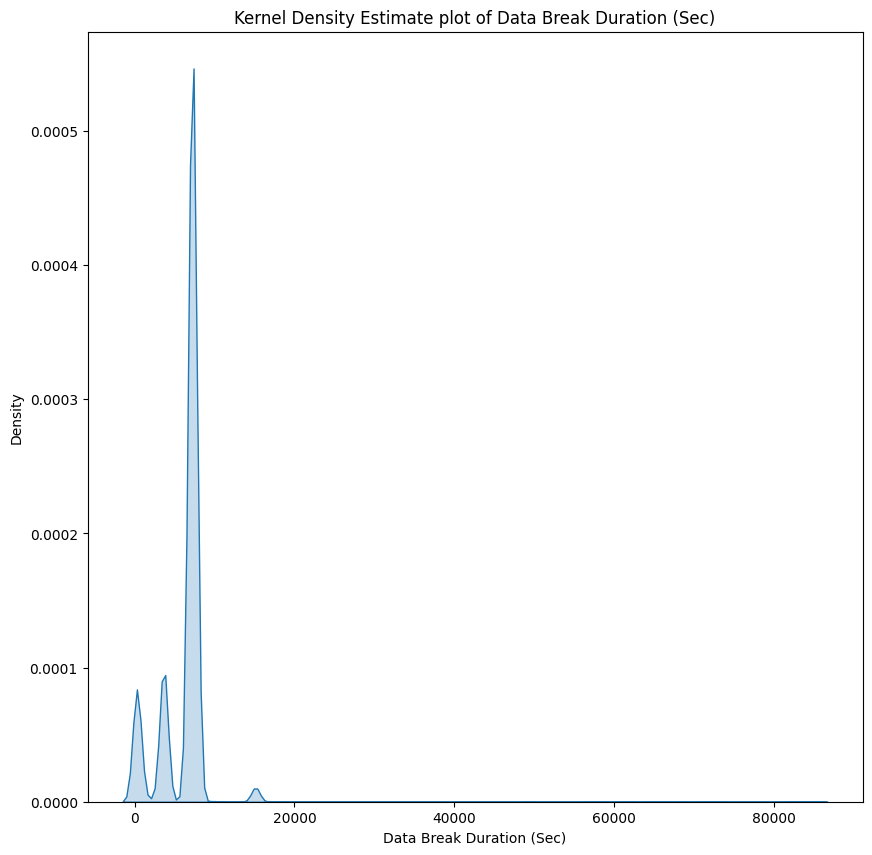

In [20]:
import seaborn as sns

plt.figure(figsize=[10,10])
sns.kdeplot(tb_data['data_break_duration'], fill=True)
plt.title('Kernel Density Estimate plot of Data Break Duration (Sec)')
plt.xlabel('Data Break Duration (Sec)')
plt.ylabel('Density')
plt.show()


count    1.819420e+05
mean     1.021163e+03
std      7.710483e+03
min      4.500000e+01
25%      2.250000e+02
50%      8.550000e+02
75%      8.850000e+02
max      2.249625e+06
Name: data_break_duration, dtype: float64


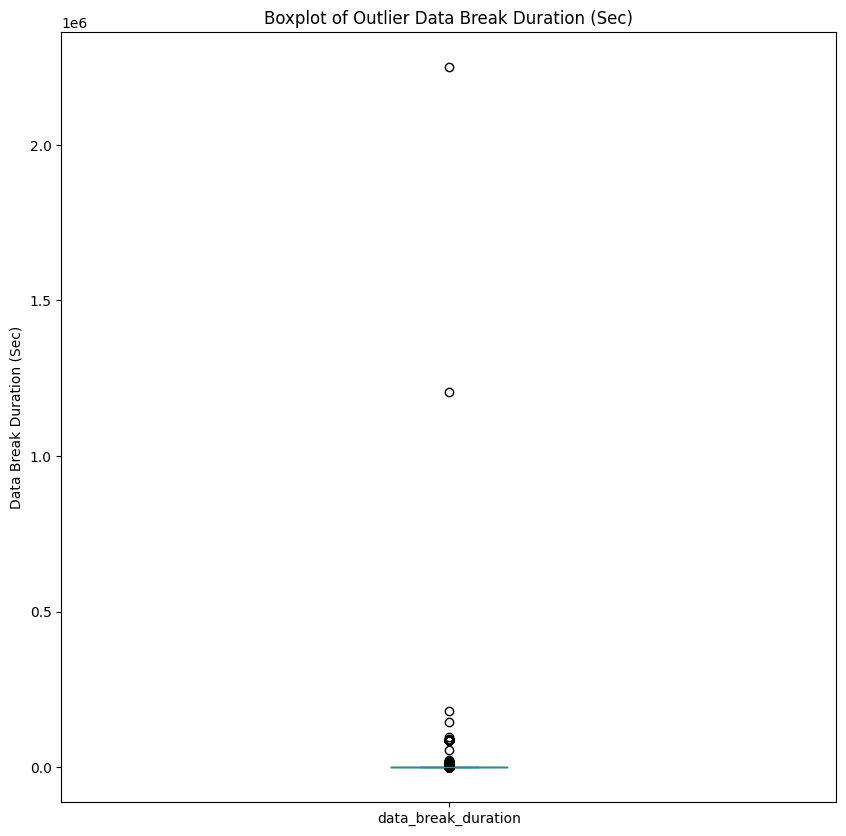

In [15]:
outlier_data = tb_data[(tb_data['data_break_duration'] < q1) | (tb_data['data_break_duration'] > q3)]['data_break_duration']

outlier_stats = outlier_data.describe()
print(outlier_stats)

plt.figure(figsize=[10,10])
outlier_data.plot(kind='box')
plt.title('Boxplot of Outlier Data Break Duration (Sec)')
plt.ylabel('Data Break Duration (Sec)')
plt.show()


In [4]:
tb_data[tb_data["node"] == "r37n4"]

,node,block_id,start_time,end_time,start_row,end_row,anomalyCount,num_records,block_duration_sec,block_duration
5998,r37n4,0,2022-08-25 10:27:00,2022-08-26 18:09:30,1,3806,0,3806,114150,31:42:30
5999,r37n4,1,2022-08-26 20:10:00,2022-09-04 14:33:00,3807,29053,0,25247,757380,210:23:00
6000,r37n4,2,2022-09-04 16:33:30,2022-09-06 12:47:00,29054,34361,0,5308,159210,44:13:30
6001,r37n4,3,2022-09-06 14:47:30,2022-09-07 14:17:00,34362,37181,0,2820,84570,23:29:30
6002,r37n4,4,2022-09-07 16:17:30,2022-09-11 17:58:30,37182,48904,0,11723,351660,97:41:00
6003,r37n4,5,2022-09-11 17:59:30,2022-09-13 14:28:30,48905,54243,0,5339,160140,44:29:00
6004,r37n4,6,2022-09-13 16:29:00,2022-09-19 11:27:00,54244,70920,0,16677,500280,138:58:00
6005,r37n4,7,2022-09-19 13:27:30,2022-09-20 10:37:00,70921,73460,0,2540,76170,21:09:30
6006,r37n4,8,2022-09-20 12:37:30,2022-09-22 09:56:30,73461,78899,0,5439,163140,45:19:00
6007,r37n4,9,2022-09-22 11:57:00,2022-09-23 12:54:00,78900,81894,0,2995,89820,24:57:00
